# Figure 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

c_c = 'xkcd:bright sky blue'
c_p = 'xkcd:bright blue'
c_v = 'green'
c_h = 'yellowgreen'
c_e = 'black'

SMALLER_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('xtick.major', size=10)
plt.rc('xtick', direction="inout")
plt.rc('ytick.major', size=10)
plt.rc('ytick', direction="inout")
plt.rc('ytick.minor',size=5)

In [2]:
def avg_e(planet, which_run):
    file_planet = '../bin/phaeton_' + which_run + '/data_in_mat/' + planet
    pl_e = []

    with open(file_planet, 'r') as f:  
        lines =  f.read().splitlines()[1000000::]
        for line in lines:
            pl_e.append(float(line.split(None, 21)[2]))
    return(np.average(pl_e))

planets = ['Venus', 'Earth', 'Mars']
runs = ['H_ceres', 'H_vesta', 'H_pallas', 'H_hygeia', 
        'max_ceres', 'max_vesta', 'max_pallas', 'max_hygeia']

points = []

for planet in planets:
    print(f'{planet}:')
    es = np.zeros(8)    # list to hold the avg. eccentricity values for each run

    for i, run in enumerate(runs):
        es[i] = avg_e(planet, run)
    
    min_run_5m = es[0:3].argmin()
    max_run_5m = es[0:3].argmax()    
    print('  Min avg. e, 5M Phaeton:', min(es[0:3]), 'in', runs[min_run_5m])
    print('  Max avg. e, 5M Phaeton:', max(es[0:3]), 'in', runs[max_run_5m])
    min_run_10m = es[4:].argmin()
    max_run_10m = es[4:].argmax()    
    print('  Min avg. e, 10M Phaeton:', min(es[4:]), 'in', runs[min_run_10m])
    print('  Max avg. e, 10M Phaeton:', max(es[4:]), 'in', runs[max_run_10m])

    points.append(min(es[0:3]))
    points.append(max(es[0:3]))
    points.append(min(es[4:]))
    points.append(max(es[4:]))

Venus:
  Min avg. e, 5M Phaeton: 0.02721459549697604 in H_ceres
  Max avg. e, 5M Phaeton: 0.10437076654355004 in H_pallas
  Min avg. e, 10M Phaeton: 0.028567491663711392 in H_ceres
  Max avg. e, 10M Phaeton: 0.2749127375856937 in H_pallas
Earth:
  Min avg. e, 5M Phaeton: 0.022739728575185032 in H_ceres
  Max avg. e, 5M Phaeton: 0.07799594187534921 in H_pallas
  Min avg. e, 10M Phaeton: 0.024699991254706007 in H_ceres
  Max avg. e, 10M Phaeton: 0.19739996706837082 in H_pallas
Mars:
  Min avg. e, 5M Phaeton: 0.059914819191931035 in H_pallas
  Max avg. e, 5M Phaeton: 0.24867324664340792 in H_vesta
  Min avg. e, 10M Phaeton: 0.10043622342813358 in H_pallas
  Max avg. e, 10M Phaeton: 0.354065135447019 in H_vesta


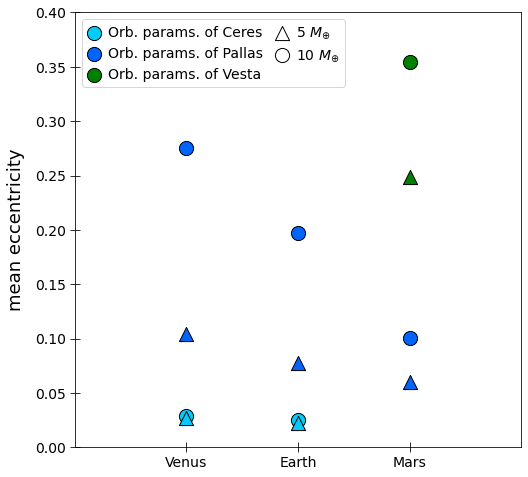

In [3]:
plt.figure(figsize = (8,8), facecolor="white")
ax = plt.gca()

plt.ylabel("mean eccentricity", labelpad=10)
plt.xlim(0,4)
plt.ylim(0, 0.4)
plt.xticks([1, 2, 3], labels=['Venus', 'Earth', 'Mars'])

size = 200
edg = 'black'

# Venus:
plt.scatter(1., points[0], c=c_c, marker = '^', s = size, edgecolor=edg, zorder=10)
plt.scatter(1., points[1], c=c_p, marker = '^', s = size, edgecolor=edg, zorder=10)
plt.scatter(1., points[2], c=c_c, s = size, edgecolor=edg, zorder=5,
            label='Orb. params. of Ceres')
plt.scatter(1., points[3], c=c_p, s = size, edgecolor=edg, zorder=5,
            label='Orb. params. of Pallas')

# Earth:
plt.scatter(2., points[4], c=c_c, marker = '^', s = size, edgecolor=edg, zorder=10)
plt.scatter(2., points[5], c=c_p, marker = '^', s = size, edgecolor=edg, zorder=10)
plt.scatter(2., points[6], c=c_c, s = size, edgecolor=edg, zorder=5)
plt.scatter(2., points[7], c=c_p, s = size, edgecolor=edg, zorder=5)

# Mars:
plt.scatter(3., points[8], c=c_p, marker = '^', s = size, edgecolor=edg, zorder=10)
plt.scatter(3., points[9], c=c_v, marker = '^', s = size, edgecolor=edg, zorder=10)
plt.scatter(3., points[10], c=c_p, s = size, edgecolor=edg, zorder=5)
plt.scatter(3., points[11], c=c_v, s = size, edgecolor=edg, zorder=5, label='Orb. params. of Vesta')

# Off-screen plots for legend shape entries:
plt.scatter(-1.,-1., c='white',marker='^', edgecolor=edg, s=size, label=r'$5\ M_⊕$')
plt.scatter(-1.,-1., c='white', edgecolor=edg, s=size, label=r'$10\ M_⊕$')

plt.legend(loc='upper left', ncol=2, handlelength=1, handletextpad=0.5, columnspacing=0.8)
plt.savefig('fig_10.png', dpi=300,bbox_inches="tight")
plt.show()